---

#C - Support Vector Machine
I used an implementation of libsvm from sklear (class SVC) in order to classify the data that I have generated in two categories: event occoured or not.


---
First I need to mount the partition on G-Drive with the data:


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/svm

Then I imported all necessary libs, load the datasets and perform a random permutation of records.

In [0]:
from sklearn import datasets, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [0]:

data_mfcc, label_mfcc = datasets.load_svmlight_file('dataset_libsvm_mfcc.txt')
data_dwt,label_dwt = datasets.load_svmlight_file('dataset_libsvm_dwt.txt')


#shuffle the data
perm_mfcc = np.random.permutation(data_mfcc.shape[0])
perm_dwt = np.random.permutation(data_dwt.shape[0])

X_mfcc = data_mfcc[perm_mfcc]
y_mfcc = label_mfcc[perm_mfcc]

X_dwt = data_dwt[perm_dwt]
y_dwt = label_dwt[perm_dwt]



#try to print the dataset loaded just to check if all is ok.
print('First the dataset:') 
print(data_dwt)
print('\n-----------------------------------\n') 
print('Then the labels:')
print(label_dwt)


Then I used GridSearch to find appropriate parameters before classify on whole dataset. So I took a small sample, 30% of the dataset.

In [21]:
#Take a subset of the initial dataset ( 20% )
n_train_mfcc = round(0.3 * data_mfcc.shape[0])
n_train_dwt = round(0.3 * data_dwt.shape[0])

X_mfcc_small, Y_mfcc_small = X_mfcc[:n_train_mfcc], y_mfcc[:n_train_mfcc]
X_dwt_small, Y_dwt_small = X_dwt[:n_train_dwt], y_dwt[:n_train_mfcc]

#Set list of parameters
param_grid_dwt = [{'C': [0.7, 1, 2, 3, 4, 5, 10], 'gamma': [0.001, 0.002, 0.0008, 0.003, 0.0001], 'kernel': ['rbf']},]

param_grid_mfcc = [{'C': [1000, 1500, 2000, 2500, 3000, 3100], 'gamma': [0.001,0.002, 0.006, 0.0008, 0.0009, 0.0007], 'kernel': ['rbf']},]

#Define the model
svm_mfcc = SVC()
svm_dwt = SVC()

#launch gridsearch with model and params
classifier_mfcc = GridSearchCV(svm_mfcc, param_grid_mfcc, n_jobs=-1, cv=5, verbose=1)
classifier_dwt = GridSearchCV(svm_dwt, param_grid_dwt, n_jobs=-1, cv=5, verbose=1)


#Now we launch grid search and then print out the best estimator:
classifier_mfcc.fit(X_mfcc_small,Y_dwt_small)
classifier_dwt.fit(X_dwt_small,Y_dwt_small)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   20.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   17.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.7, 1, 2, 3, 4, 5, 10],
                          'gamma': [0.001, 0.002, 0.0008, 0.003, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Let's try to print the best classifiers found from GridSearchCV:

In [23]:
print ('RESULTS DWT\n')

print("Best parameters set found:")
print(classifier_dwt.best_params_)


print("\nScore with best parameters:")
print(classifier_dwt.best_score_)

print("\nAll scores on the grid:")
print(classifier_dwt.cv_results_["mean_test_score"])

print('\n---------------------------------------------------------------')

print ('\nRESULTS MFCC\n')

print("Best parameters set found:")
print(classifier_mfcc.best_params_)


print("\nScore with best parameters:")
print(classifier_mfcc.best_score_)

print("\nAll scores on the grid:")
print(classifier_mfcc.cv_results_["mean_test_score"])

RESULTS DWT

Best parameters set found:
{'C': 0.7, 'gamma': 0.001, 'kernel': 'rbf'}

Score with best parameters:
0.9536612021857923

All scores on the grid:
[0.9536612  0.9536612  0.9536612  0.9536612  0.94704918 0.9536612
 0.9536612  0.9536612  0.9536612  0.9536612  0.9536612  0.9536612
 0.9536612  0.9536612  0.9536612  0.9536612  0.9536612  0.9536612
 0.95032787 0.9536612  0.9536612  0.95032787 0.9536612  0.95032787
 0.9536612  0.9536612  0.95032787 0.9536612  0.95032787 0.9536612
 0.95032787 0.9536612  0.95032787 0.95360656 0.9536612 ]

---------------------------------------------------------------

RESULTS MFCC

Best parameters set found:
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Score with best parameters:
0.5267759562841531

All scores on the grid:
[0.52677596 0.50677596 0.52005464 0.52344262 0.52344262 0.52344262
 0.51349727 0.52338798 0.50677596 0.52344262 0.51677596 0.52338798
 0.50344262 0.51349727 0.50688525 0.5068306  0.51005464 0.51677596
 0.51010929 0.52010929 0.5035

Now select the best svm's params for each dataset and classify the entire dataset mfcc and dwt:

In [0]:
#initialize two SVMs with the best params
best_SVM_dwt = SVC(kernel=classifier_dwt.best_params_['kernel'],C=classifier_dwt.best_params_['C'],gamma=classifier_dwt.best_params_['gamma'])
best_SVM_mfcc = SVC(kernel=classifier_mfcc.best_params_['kernel'],C=classifier_mfcc.best_params_['C'],gamma=classifier_mfcc.best_params_['gamma'])

#shuffle the data again
perm_mfcc = np.random.permutation(data_mfcc.shape[0])
perm_dwt  = np.random.permutation(data_dwt.shape[0])

X_mfcc = data_mfcc[perm_mfcc]
y_mfcc = label_mfcc[perm_mfcc]

X_dwt = data_dwt[perm_dwt]
y_dwt = label_dwt[perm_dwt]

#80% to training
m_train_mfcc = round(0.8 * data_mfcc.shape[0])
m_train_dwt  = round(0.8 * data_dwt.shape[0])

X_train_mfcc, X_test_mfcc = X_mfcc[:m_train_mfcc], X_mfcc[m_train_mfcc:]
y_train_mfcc, y_test_mfcc = y_mfcc[:m_train_mfcc], y_mfcc[m_train_mfcc:]

X_train_dwt, X_test_dwt = X_dwt[:m_train_dwt], X_dwt[m_train_dwt:]
y_train_dwt, y_test_dwt = y_dwt[:m_train_dwt], y_dwt[m_train_dwt:]


best_SVM_dwt.fit(X_train_dwt, y_train_dwt)
best_SVM_mfcc.fit(X_train_mfcc, y_train_mfcc)

train_err_mfcc = 1 - best_SVM_mfcc.score(X_train_mfcc,y_train_mfcc) 
train_err_dwt = 1 - best_SVM_dwt.score(X_train_dwt,y_train_dwt)

test_err_mfcc = 1 - best_SVM_mfcc.score(X_test_mfcc,y_test_mfcc)
test_err_dwt = 1 - best_SVM_dwt.score(X_test_dwt,y_test_dwt)



Now print out training and test errors:

In [27]:
print("TRAINING ERRORS:\n")
print("Train mfcc --> " + str(train_err_mfcc))
print("\nTrain dwt --> " + str(train_err_dwt))
print("\n------------------------------------------------\n")
print("TEST ERRORS:\n")
print("Test mfcc --> " + str(test_err_mfcc))
print("\nTest dwt --> " + str(test_err_dwt))

TRAINING ERRORS:

Train mfcc --> 0.011194029850746245

Train dwt --> 0.04850746268656714

------------------------------------------------

TEST ERRORS:

Test mfcc --> 0.04477611940298509

Test dwt --> 0.05970149253731338


#PLOT ROC CURVE 
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

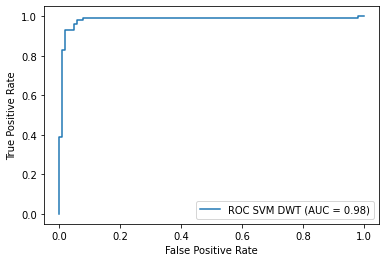

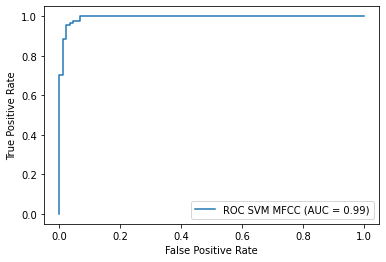

In [16]:
metrics.plot_roc_curve(best_SVM_dwt, X_test_dwt, y_test_dwt,name='ROC SVM DWT')
metrics.plot_roc_curve(best_SVM_mfcc, X_test_mfcc, y_test_mfcc,name='ROC SVM MFCC')

plt.show()